# Monte Carlo control variance Simulation Asian option

In [ ]:
'''
Group member:
Dai tianjiao (td2236)
Zheng Jiajing (jz3420)
Zhao yunhao (yz8385)

Professor:
Daniel Totouom Tangho

'''


In [1]:
import numpy as np
import numpy.random as npr
import math
import matplotlib.pyplot as plt

Simulate Stock Prices using Geometric Brownian Motion


$S_t = S_0 \exp{((r - \sigma^2 / 2) t + \sigma B_t)}$

In [2]:
#Initial parameters
T = 1 # time interval=1day
N = 252 # time interval number=1year
S0 = 100 # initial stock price
K = 80 # strike price
sig = 0.2 # volatility
r = 0.1 # expected return rate = risk-free rate
#Simulates stock prices
np.random.seed(123)#Random seeds are the same every time
Sr=0
Cr=0
n=100
m=100

for i in range(n):
    s0=0
    Sij_1=S0
    t = np.linspace(0, 1, m + 1)
    for j in range(m):
        u, std = 0, math.sqrt(T / m)
        zij=np.random.normal(u, std, 1)      
        Sij = Sij_1 * np.exp((r - sig ** 2/2) * t[i] + sig * zij)
        Sij_1=Sij
        s0+=np.maximum(0, (Sij-K))
        Cj=np.maximum(0, (Sij-K))*np.exp(r* T*(-1))
    s=s0/m
    Sr+=np.maximum(0, (s-K))
    Ci=np.maximum(0, (s-K))*np.exp(r* T*(-1))
    Cr+=Ci
S=Sr/n/m
C=Cr/n/m

In [3]:
S

array([54.03252613])

In [ ]:
# PDE

In [4]:
S0=100   
u=0.05 
sigma=0.2
lamb=0.75 
mu=-0.6  
delta=0.25 
T=1.0 
M=252 
I=10000
dt=T/M 

rj=lamb*(np.exp(mu+0.5*delta**2)-1)
S=np.zeros((M+1,I))
S[0]=S0
sn1=npr.standard_normal((M+1,I))
sn2=npr.standard_normal((M+1,I))
poi=npr.poisson(lamb*dt,(M+1,I))
Sr=0
Cr=0

for t in range(1,M+1,1):
    S[t]=S[t-1]*(np.exp((u-rj-0.5*sigma**2)*dt)+sigma*np.sqrt(dt)*sn1[t]+(np.exp(mu+delta*sn2[t])-1)*poi[t])
    S[t]=np.maximum((S[t]-K),0)
    Sr+=np.mean(S[t])
    Ci=S[t]*np.exp(rj*dt*(-1))
    Cr+=np.mean(Ci)
S=Sr
c=Cr

In [5]:
S

20.086808702002074

# PDE Ingersoll method

In [12]:
import numpy.random as npr
x0=0.05 
kappa=3.0 
theta=0.02 
sigma=0.1 
I=100
M=100#252*2 
dt=T/M 
Sr=0
Cr=0
n=100

s0=0
xh=np.zeros((M+1,I)) 
x1=np.zeros_like(xh) 
xh[0]=x0 
x1[0]=x0 
for t in range(1,M+1): 
    xh[t]=(xh[t-1]+kappa*(theta-np.maximum(xh[t-1],0))*dt+sigma*np.sqrt(np.maximum(xh[t-1],0))*np.sqrt(dt)*npr.standard_normal(I)) 
    x1=np.maximum(xh,0) 
    s0=np.mean(np.maximum(0, (np.exp(x1*T*M)-K)))
    Sr+=s0
    Ci=s0*np.exp(r* T*(-1))
    Cr+=Ci
S=Sr/Mkappa
C=Cr/M

In [13]:
S

5.6904944147880325

# before

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Simulates stock prices function using Geometric Brownian Motion.
def simulate_stock_price(T, N, S0, sig, r):   
    b = np.array([0])
    Eu, std = 0, math.sqrt(T / N) #mean and standard deviation ==>Bt
    s = np.append(0, np.random.normal(Eu, std, N))#N samples with normal distribution
    Bt = np.cumsum(s)#cumulative sum
    t = np.linspace(0, 1, N + 1)#0-1 split N+1
    St = S0 * np.exp((r - sig ** 2/2) * t + sig * Bt)# create N+1 St
    return St

Text(0.5, 1.0, 'Simulates Stock Prices using Geometric Brownian Motion')

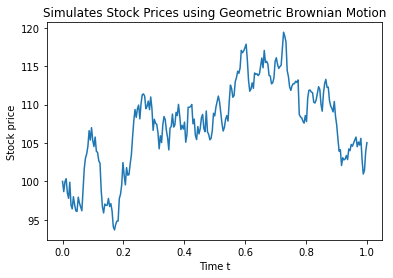

In [3]:
#Initial parameters
T = 1 # time interval=1day
N = 252 # time interval number=1year
S0 = 100 # initial stock price
K = 80 # strike price
sig = 0.2 # volatility
r = 0.1 # expected return rate = risk-free rate
#Simulates stock prices
np.random.seed(123)#Random seeds are the same every time
St = simulate_stock_price(T, N, S0, sig, r)#
t = np.linspace(0, 1, N + 1)
plt.plot(t, St)
plt.ylabel("Stock price")
plt.xlabel("Time t")
plt.title("Simulates Stock Prices using Geometric Brownian Motion")

In [4]:
#function Asian option using Monte Carlo Simulation
def MCS_asian_option_prices(T,S0, K, r,sig,option_type,strike_type,M):
    payoffs = np.zeros(M)
    for i in range(M):#M times
        St = simulate_stock_price(T, N, S0, sig, r)
        S_mean = np.mean(St)
        # calculate payoffs
        payoff = 0
        #option_type,strike_type==>payoff
        if option_type == "call":
            payoff = np.maximum(0, S_mean - K) if strike_type == "fixed" else np.maximum(0, St[-1] - S_mean)
        elif option_type == "put":
            payoff = np.maximum(0, K - S_mean) if strike_type == "fixed" else np.maximum(0, S_mean - St[-1])
        #==>payoffs M times
        payoffs[i] = payoff
        result=np.round(np.exp(-1 * r * T) * np.mean(payoffs),4)# out
    return result

fixed-strike Asian call price:  22.9389


Text(0.5, 1.0, 'Asian call price & Monte Carlo Simulation')

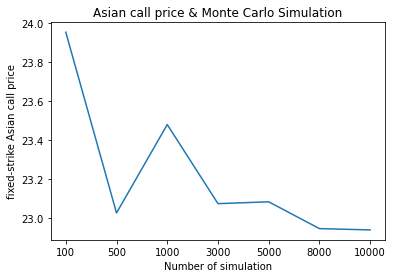

In [5]:
number_simulation=[100, 500, 1000, 3000, 5000, 8000, 10000]
fixed_strike_call_p = np.zeros(len(number_simulation))

for i in range(len(number_simulation)):
    np.random.seed(123)
    fixed_strike_call_p[i] = MCS_asian_option_prices(T,S0, K, r,sig,'call','fixed',number_simulation[i])
print("fixed-strike Asian call price: ", fixed_strike_call_p[-1])
plt.plot([str(x) for x in number_simulation], fixed_strike_call_p)
plt.ylabel("fixed-strike Asian call price")
plt.xlabel("Number of simulation")
plt.title("Asian call price & Monte Carlo Simulation")

fixed-strike Asian call price:  2.5362


Text(0.5, 1.0, ' Asian put price & Monte Carlo Simulation')

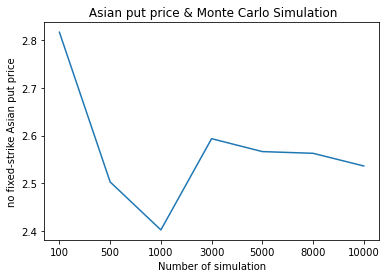

In [6]:
number_simulation=[100, 500, 1000, 3000, 5000, 8000, 10000]
nfixed_strike_put_p = np.zeros(len(number_simulation))

for i in range(len(number_simulation)):
    np.random.seed(123)
    nfixed_strike_put_p[i] = MCS_asian_option_prices(T,S0, K, r,sig,'put','no-fixed',number_simulation[i])
print("fixed-strike Asian call price: ", nfixed_strike_put_p[-1])
plt.plot([str(x) for x in number_simulation], nfixed_strike_put_p)
plt.ylabel("no fixed-strike Asian put price")
plt.xlabel("Number of simulation")
plt.title(" Asian put price & Monte Carlo Simulation")

# PDE analysis Asian option

In [7]:
def payoff(st, K,option_type,strike_type):
    pay_off = []
    for i in range(len(st)):
        if i==0:
            smean=st[0]
        else:
            #Average between two points i-1 and i
            smean=np.mean(st[i-1:i+1])
        if option_type == "call":
            pay_off.append(np.maximum(0, smean - K) if strike_type == "fixed" else np.maximum(0, st[i] - smean))
        elif option_type == "put":
            pay_off.append(np.maximum(0, K - smean) if strike_type == "fixed" else np.maximum(0, smean - st[i]))
    return pay_off

In [8]:
def pde_asian(r, sig, t, T, S0, B, K, Nt, Ns, R,option_type,strike_type):
    # Define s grid points
    ds = (R - B)/Ns
    st = [B + ds*k for k in range(Ns+1)]
    # Define M: shape(Ns+1)
    M = np.identity(Ns+1)
    for i in range(1,Ns):
        # a_k
        M[i][i-1] = -dt*(-r*st[i]/(2*ds) + sig**2*(st[i]**2)/(2*(ds**2)))
        # b_k
        M[i][i] = 1 + r*dt + sig**2*(st[i]**2)*dt/(ds**2)
        # c_k
        M[i][i+1] = -dt*(r*st[i]/(2*ds) + sig**2*(st[i]**2)/(2*(ds**2)))

    M_inv = np.linalg.inv(M)
    feature_value,feature_vector=np.linalg.eig(M)
    #error
    error=np.mean(np.dot(feature_value,feature_vector))
    print('error',error)
    # Let V_Nt =(g(x_0),...,g(x_Nx))
    V_Nt = payoff(st,K,option_type,strike_type)
    # Build a matrix to store grid points
    grid_points = np.array([V_Nt]*(1+Nt)).T
    # iterate backward n = Nt,Nt−1,...,1
    for n in range(Nt,0,-1):
        # Compute C_(n-1)
        C = np.concatenate(([0]*Ns,[K*(np.exp(-r*T+r*(t+dt*n))-np.exp(-r*T+r*(t+dt*(n-1))))]))
        # Compute V_(n-1) from V_n
        grid_points[:,n-1] = M_inv@grid_points[:,n] + C

    s_point = int((S0-B)/ds)
    result=np.round(grid_points[s_point,0],4)
    return result
    

error 2.5011045357896404
error 14.614472555626639
error 26.019110721483823
error 31.760516709331725
error -13.835539023645717
error 37.705329632912374
error 51.38714254020585
error 27.933190770505195
error -6.325014036522986
The price of the option at time t based on PDE is: 
 26.9902


Text(0.5, 1.0, ' Asian put price & Monte Carlo Simulation')

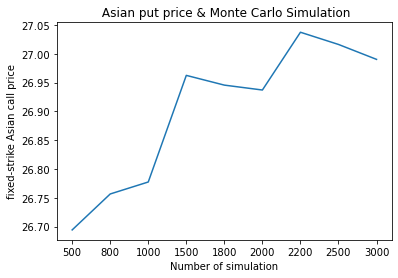

In [9]:
T = 1
N = 252
S0 = 100
K = 80
sig =  0.2
r = 0.1
t = 0
Nt = 252
Ns = 2200
R = 300
B = 80
dt = T/N
option_type="call"
strike_type = "fixed"
ns=[500,800,1000,1500,1800,2000,2200,2500,3000]
pde_price=[]
for Ns in ns:
    pde_price.append(pde_asian(r, sig, t, T, S0, B, K, Nt, Ns, R,option_type,strike_type))
print('The price of the option at time t based on PDE is: \n',pde_price[-1])
plt.plot([str(x) for x in ns], pde_price)
plt.ylabel("fixed-strike Asian call price")
plt.xlabel("Number of simulation")
plt.title(" Asian put price & Monte Carlo Simulation")

# Pricing Asian Options and Basket Options by Monte Carlo Methods

#### Algorithm of Naive Monte Carlo Method for Basket Call Option

In [13]:
n=1000
T=1
d=5
w=[0.1,0.2,0.1,0.3,0.3]
s0=[100,85,110,75,90]
K=80
sig=[0.1,0.2,0.1,0.2,0.1]
delt=[0.1,0.1,0.1,0.1,0.1]
R=np.array([[1,0.9,0.8,0.8,0.6],[0.9,1,0.8,0.6,0.7],[0.8,0.8,1,0.7,0.6],[0.8,0.6,0.7,1,0.9],[0.6,0.7,0.7,0.9,1]])

In [96]:
R1 = np.dot(R,R.T)
L = np.tril(R1)
Ym=[]
for m in range(n):
    ksi=np.random.normal(0,1,5)
    Sit=[s0[i]*(np.exp((r-delt[i]-sig[i]**2/2)*T +sig[i]*(T**0.5)*np.sum((L[i]*ksi)[:(i+1)])))for i in range(d)]
    pa=np.max(np.sum(np.array(w)*np.array(Sit))-K,0)
    g=np.exp(np.sum(np.array(w)*math.log(np.array(Sit[1]))))
    A=np.sum(np.array(w)*np.array(Sit))
    if g>K:
        W=(A-K)
    else:
        W=0
    uw=[np.sum(w[i]*np.exp(delt[i]+sig[i]**2/2))-K for i in range(d)]
    c1=0.1#-np.cov(pa,W)/np.var(W)
    Ym.append(np.exp(-r**T)*(Sit[0]-K))#*(pa+np.dot(c1*(W-uw)))
y=np.mean(Ym)
y

                



<ipython-input-96-96fd5825c193>:6: RuntimeWarning: overflow encountered in exp
  Sit=[s0[i]*(np.exp((r-delt[i]-sig[i]**2/2)*T +sig[i]*(T**0.5)*np.sum((L[i]*ksi)[:(i+1)])))for i in range(d)]
<ipython-input-96-96fd5825c193>:6: RuntimeWarning: overflow encountered in double_scalars
  Sit=[s0[i]*(np.exp((r-delt[i]-sig[i]**2/2)*T +sig[i]*(T**0.5)*np.sum((L[i]*ksi)[:(i+1)])))for i in range(d)]


# Monte Carlo with Control Variate

In [ ]:
import math
import random
from scipy.stats import norm

In [ ]:
def geo_path(mu,sigma2,t,S):
    path = np.zeros(len(t))
    path[0] = S*np.exp((mu-sigma2/2)*t[0]+math.pow(sigma2*t[0],0.5)*random.gauss(mu=0, sigma = 1))
    for i in range(1,len(t)):
        delta = t[x]-t[x-1]
        path[x] = path[x-1]*np.exp((mu-sigma2/2)*delta)+math.pow(sigma2*t[0],0.5)*random.gauss(mu=0, sigma = 1)
    return(path)

def geo_mean(values):
    mean = np.mean(np.log(values))
    return(np.exp(mean))

def payoff_geo(K,path):
    payoff = max(geo_mean(path)-K,0)
    return(payoff)

#calculate the expected payoff from geometric Asian
def geo_payoff(mu,sigma2,t,S,K): 
    t_mean = np.mean(t)
    v = np.zeros(len(t))
    for i in range(0,len(t)):
        v[i]=2*(len(t)-i)-1
    total = np.dot(t,v)
    sigma2_mean = sigma2*total/(math.pow(len(t),2)*t_mean)
    mu_mean = mu+(sigma2_mean-sigma2)/2
    d_1 = (np.log(S/K)+(mu_mean + sigma2_mean/2)*t_mean)/math.pow(sigma2_mean*t_mean,0.5)
    d_2 = d_1 - (math.pow(sigma2_mean,0.5))
    result = np.exp(mu_mean*t_mean)*S*norm.cdf(d_1)-K*norm.cdf(d_2))
    return result
    
def payoff_ari(K,path):
    payoff = max(np.mean(path)-K,0)
    return(payoff)


In [ ]:
#Monte Carlo with control variate
def optimal_control_coefficient(mu,sigma2,t,S,K,sims):
    geometry = np.zeros(sims)
    arithmetic = np.zeros(sims)
    for n in range(0,sims):
        path = geo_path(mu,sigma2,t,S)
        geometry[n] = payoff_geo(K,path)
        arithmetic[n] = payoff_ari(K,path)
    S_xy = 0
    Variance_x = 0
    for n in range(0,sims):
        S_xy = S_xy + (geometry[n]-np.mean(geometry))*(arithmetic[n]-np.mean(arithmetic))
        Variance_x = Variance_x + geometry[n]-math.pow(np.mean(geometry),2)
    return(S_xy/Variance_x)

def optimal_coefficient_K(mu,sigma2,t,S,K,sim):
    result = np.zeros(len(K))
    for n in range(0,len(K)):
        K_0 = K[n]
        result[n] = optimal_control_coefficient(mu,sigma2,t,S,K,sims)
    return(result)

#Estimate expected payoff from arithmetic Asian options with control variates
def expected_payoff_arithmetic(mu,sigma2,t,S,K,sim,b):
    geometry = np.zeros(sim)
    arithmetic = np.zeros(sim)
    for n in range(0,sim):
        path = geometric_path(mu,sigma2,t,S)
        arithmetic[n] = payoff_ari(K,path)
        geometric[n] = payoff_geo(K,path)-geo_payoff(mu,sigma2,t,S,K)
    result = np.mean(arithmetic)-b*np.mean(geometry)
    return(result)

#estimate expected payoff from arithmetic Asian for several values of K
#with control variates
def expected_payoff_ari_K(mu,sigma2,t,S,K,sim,b):
    geometry = np.zeros([len(K),sim])
    arithmetic = np.zeros([len(K),sim])
    result = np.zeros(len(K))
    for n in range(0,sim):
        path = geo_path(mu,sigma2,t,S)
        for m in range(0,len(K)):
            item = K[m]
            arithmetic[m,n] = payoff_ari(K,path)
            geometry[m,n] = payoff_geo(K,path)-geo_payoff(mu,sigma2,t,S,K)
    for m in range(0,len(K)):
        final[m] = np.mean(arithmetic[m,:])-b[m]*np.mean(geometry[m,:])
    return(final)   
    